In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import necessary libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('results2.csv')
df

,DataLabel,TP,TE1,TE2,TE3,TE4,Program Number,Batch Status
0,1,2.110000,0.000000,122.100000,122.200000,122.100000,8,FAILED
1,2,2.109180,121.744262,121.963115,122.161475,122.013934,8,OK
2,3,2.108934,121.779508,122.040164,122.269672,122.140164,3,OK
3,4,2.109024,121.760163,121.968293,122.203252,122.082927,11,OK
4,5,2.109754,121.595902,121.831148,122.027869,121.883607,10,OK
...,...,...,...,...,...,...,...,...
1855,1856,2.109396,122.173077,122.124176,122.273626,122.214835,16,OK
1856,1857,0.080000,19.700000,19.700000,19.800000,19.800000,1,Maintenance
1857,1858,2.107097,122.111290,122.088710,122.220968,122.175806,12,OK
1858,1859,2.109396,122.238462,122.128571,122.275824,122.225275,16,OK


In [18]:
df['Batch Status Encoded'] = df['Batch Status'].apply(lambda x: 1 if x == 'OK' else 0)
df.drop(columns=['Batch Status'], inplace=True)

df.rename(columns={'Batch Status Encoded': 'Batch Status'}, inplace=True)
df.head()

,DataLabel,TP,TE1,TE2,TE3,TE4,Program Number,Batch Status
0,1,2.110000,0.000000,122.100000,122.200000,122.100000,8,0
1,2,2.109180,121.744262,121.963115,122.161475,122.013934,8,1
2,3,2.108934,121.779508,122.040164,122.269672,122.140164,3,1
3,4,2.109024,121.760163,121.968293,122.203252,122.082927,11,1
4,5,2.109754,121.595902,121.831148,122.027869,121.883607,10,1


In [21]:
# update the results2.csv file with the new column
df.to_csv('results3.csv', index=False)

In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [29]:
cols = list(df)[1:8]
cols

['TP', 'TE1', 'TE2', 'TE3', 'TE4', 'Program Number', 'Batch Status']

In [38]:



#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (1840, 20, 7).
trainY shape == (1840, 1).


In [34]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 14, 64)            18432     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
 1/92 [..............................] - ETA: 0s - loss: 0.8138

92/92 [==============================] - 1s 10ms/step - loss: 0.6662 - val_loss: 0.4319
Epoch 2/10
92/92 [==============================] - 1s 13ms/step - loss: 0.6465 - val_loss: 0.4311
Epoch 3/10
92/92 [==============================] - 1s 12ms/step - loss: 0.6337 - val_loss: 0.4406
Epoch 4/10
92/92 [==============================] - 1s 11ms/step - loss: 0.6409 - val_loss: 0.4403
Epoch 5/10
92/92 [==============================] - 1s 10ms/step - loss: 0.6262 - val_loss: 0.4385
Epoch 6/10
92/92 [==============================] - 1s 10ms/step - loss: 0.6074 - val_loss: 0.4349
Epoch 7/10
92/92 [==============================] - 1s 10ms/step - loss: 0.6113 - val_loss: 0.4306
Epoch 8/10
92/92 [==============================] - 1s 13ms/step - loss: 0.6327 - val_loss: 0.4423
Epoch 9/10
92/92 [==============================] - 1s 11ms/step - loss: 0.6181 - val_loss: 0.4373
Epoch 10/10
58/58 [==============================] - 0s 4ms/step - loss: 0.5285


0.5285272598266602

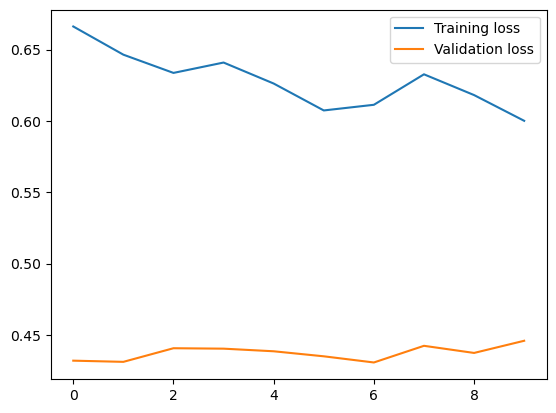

In [41]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# accuracy
model.evaluate(trainX, trainY)

In [ ]:
last_sequence = trainY[-1:]
predicted_probability = model.predict(last_sequence)
predicted_status = (predicted_probability >= 0.5).astype(int)
print(predicted_status)

In [48]:
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df[['Program Number','TP','TE1', 'TE2', 'TE3', 'TE4']])

# Define a window size
window_size = 20

# Function to create sequences
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:(i + window_size), :])
        labels.append(data[i + window_size, -1])
    return np.array(sequences), np.array(labels)

# Create sequences
X, y = create_sequences(scaled_features, window_size)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predict the next batch status
last_sequence = X[-1:]
predicted_probability = model.predict(last_sequence)
predicted_status = (predicted_probability >= 0.5).astype(int)



Epoch 1/10
46/46 [==============================] - 3s 9ms/step - loss: 0.5645 - accuracy: 0.0048
Epoch 2/10
46/46 [==============================] - 0s 9ms/step - loss: 0.5489 - accuracy: 0.0000e+00
Epoch 3/10
46/46 [==============================] - 0s 9ms/step - loss: 0.5514 - accuracy: 0.0000e+00
Epoch 4/10
46/46 [==============================] - 0s 9ms/step - loss: 0.5487 - accuracy: 0.0000e+00
Epoch 5/10
46/46 [==============================] - 0s 9ms/step - loss: 0.5482 - accuracy: 0.0000e+00
Epoch 6/10
46/46 [==============================] - 0s 9ms/step - loss: 0.5489 - accuracy: 0.0000e+00
Epoch 7/10
46/46 [==============================] - 0s 9ms/step - loss: 0.5491 - accuracy: 0.0000e+00
Epoch 8/10
46/46 [==============================] - 0s 10ms/step - loss: 0.5475 - accuracy: 0.0000e+00
Epoch 9/10
46/46 [==============================] - 0s 9ms/step - loss: 0.5465 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 1s 585ms/step


In [7]:
status_list = []
current_status = None
count = 0

for status in df['Batch Status']:
    if status != current_status:
        if current_status is not None:
            status_list.append(f'{current_status} {count}\n')  # Append newline character
        current_status = status
        count = 1
    else:
        count += 1

# Add the last status
if current_status is not None:
    status_list.append(f'{current_status} {count}\n')  # Append newline character

# Print the combined status
print(''.join(status_list))  # Use '' to join elements with newline
# Save the combined status to a dataframe
df_status = pd.DataFrame(status_list, columns=['Status'])


FAILED 1
OK 4
FAILED 1
OK 5
Emergency Failure 1
OK 2
FAILED 1
Maintenance 2
FAILED 1
OK 7
Emergency Failure 1
OK 2
Maintenance 3
Emergency Failure 2
OK 1
FAILED 1
Maintenance 2
FAILED 2
Maintenance 1
OK 5
FAILED 2
OK 4
FAILED 1
Maintenance 1
OK 2
Emergency Failure 1
OK 2
Maintenance 1
OK 6
Maintenance 1
OK 1
FAILED 1
Maintenance 1
OK 6
FAILED 1
OK 2
Maintenance 1
OK 3
FAILED 1
OK 18
Maintenance 1
OK 1
FAILED 1
Maintenance 1
FAILED 1
Maintenance 1
OK 2
FAILED 1
Maintenance 1
OK 2
Maintenance 1
OK 1
Maintenance 1
OK 2
FAILED 2
OK 2
FAILED 1
OK 3
Maintenance 1
OK 1
Maintenance 1
OK 2
FAILED 1
Maintenance 2
FAILED 1
Maintenance 1
FAILED 1
Maintenance 1
OK 1
FAILED 2
OK 2
FAILED 2
Maintenance 1
FAILED 1
OK 3
Maintenance 2
OK 5
FAILED 3
OK 1
FAILED 1
Emergency Failure 2
Maintenance 1
OK 1
Maintenance 1
OK 7
Maintenance 1
OK 7
Maintenance 1
OK 7
Maintenance 1
OK 3
FAILED 1
Emergency Failure 6
Maintenance 1
Emergency Failure 3
Maintenance 1
Emergency Failure 1
Maintenance 3
OK 1
FAILED 1
Emerg

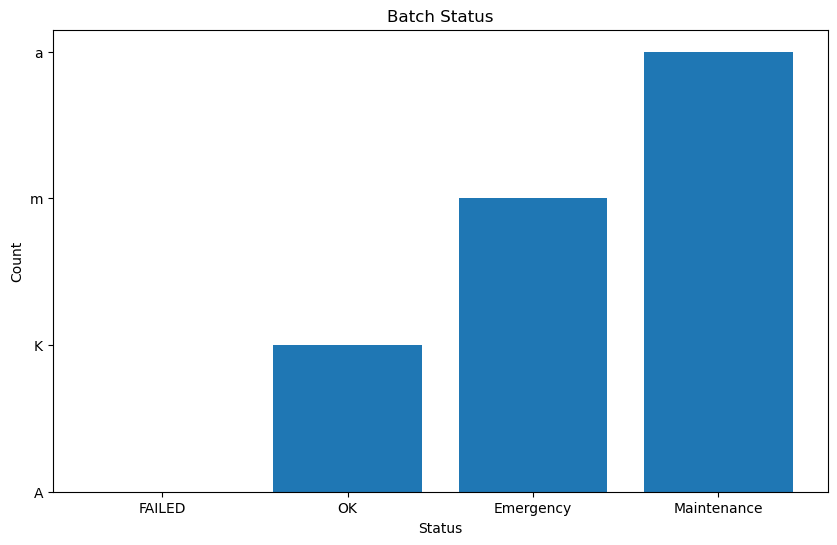

,Status,Count
0,FAILED,A
1,OK,K
2,FAILED,A
3,OK,K
4,Emergency,m


In [6]:
# make a dataframe of the above data of status and count
status_df = pd.DataFrame(status_list, columns=['Status'])
status_df['Status'] = status_df['Status'].str.split(' ')
status_df['Status'] = status_df['Status'].str[0]
status_df['Count'] = status_df['Status'].str[1]

In [7]:

# Create an empty list to store tuples of (current_status, count)
status_list = []
current_status = None
count = 0

# Iterate through the 'Batch Status' column of the DataFrame
for status in df['Batch Status']:
    if status != current_status:
        if current_status is not None:
            # Append the tuple (current_status, count) to the status_list
            status_list.append((current_status, count))
        current_status = status
        count = 1
    else:
        count += 1

# Add the last status
if current_status is not None:
    status_list.append((current_status, count))

# Create a DataFrame from the status_list
status_df = pd.DataFrame(status_list, columns=['Batch Status', 'Count'])

# Print the DataFrame
print(status_df)
# convert this dataframe to a csv file
status_df.to_csv('status_count.csv', index=False)


          Batch Status  Count
0               FAILED      1
1                   OK      4
2               FAILED      1
3                   OK      5
4    Emergency Failure      1
..                 ...    ...
441                 OK     17
442        Maintenance      1
443                 OK     17
444        Maintenance      1
445                 OK      3

[446 rows x 2 columns]


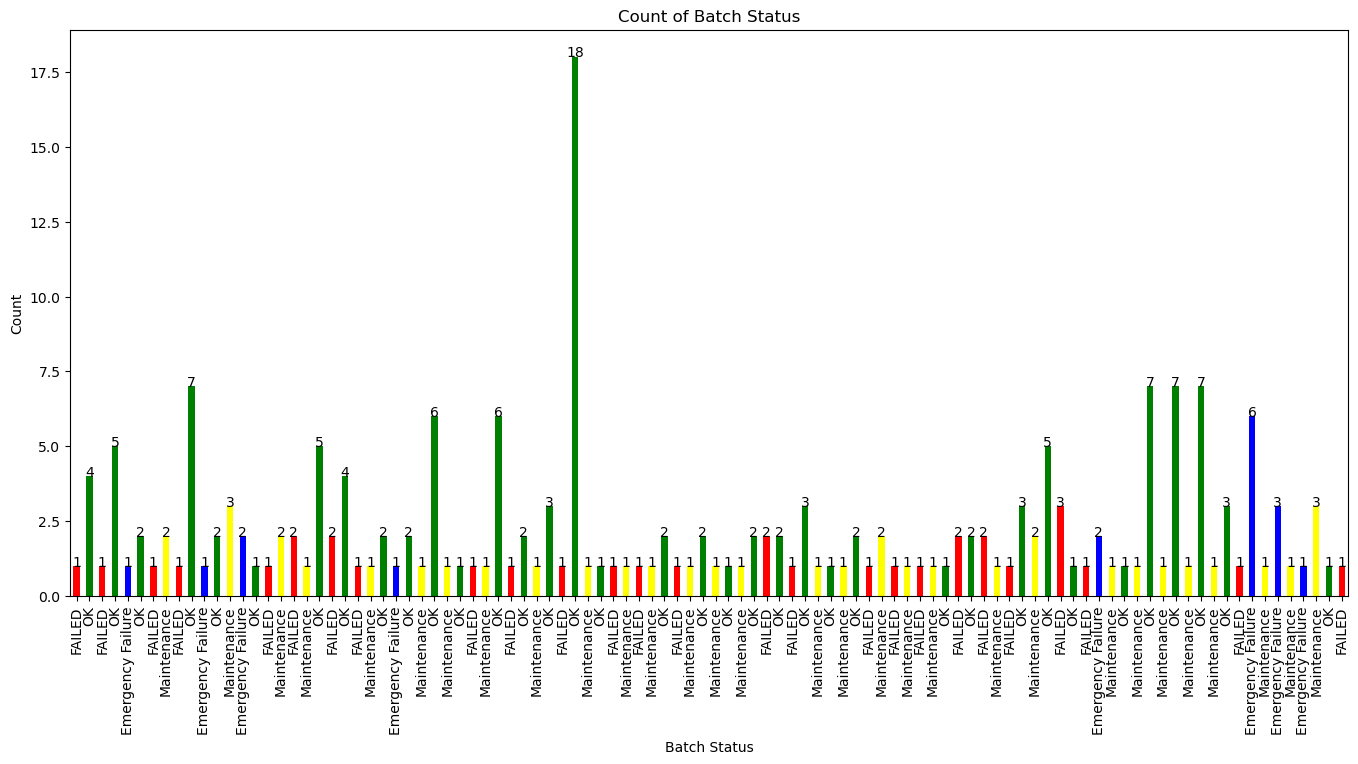

In [15]:
# Create a bar plot of the 'Batch Status' column vs the 'Count' column and give different colors to each type of Phase
# only take first 100 data points and plot
status_dff = status_df.head(100)
colors = {'OK': 'green', 'FAILED': 'red', 'Emergency Failure': 'blue','Maintenance': 'yellow'}
status_dff.plot(kind='bar', x='Batch Status', y='Count', color=status_dff['Batch Status'].map(colors), legend=False)
plt.xlabel('Batch Status')
plt.ylabel('Count')
plt.title('Count of Batch Status')
# increase width of the plot and make varialbe names readable
plt.tight_layout()
plt.xticks(rotation=90)
# increase the size of the plot
plt.gcf().set_size_inches(15, 10)
# show the plot
# write count on top of the bars
for i in range(len(status_dff)):
    plt.text(i, status_dff['Count'][i], status_dff['Count'][i], ha = 'center')
    
plt.show()


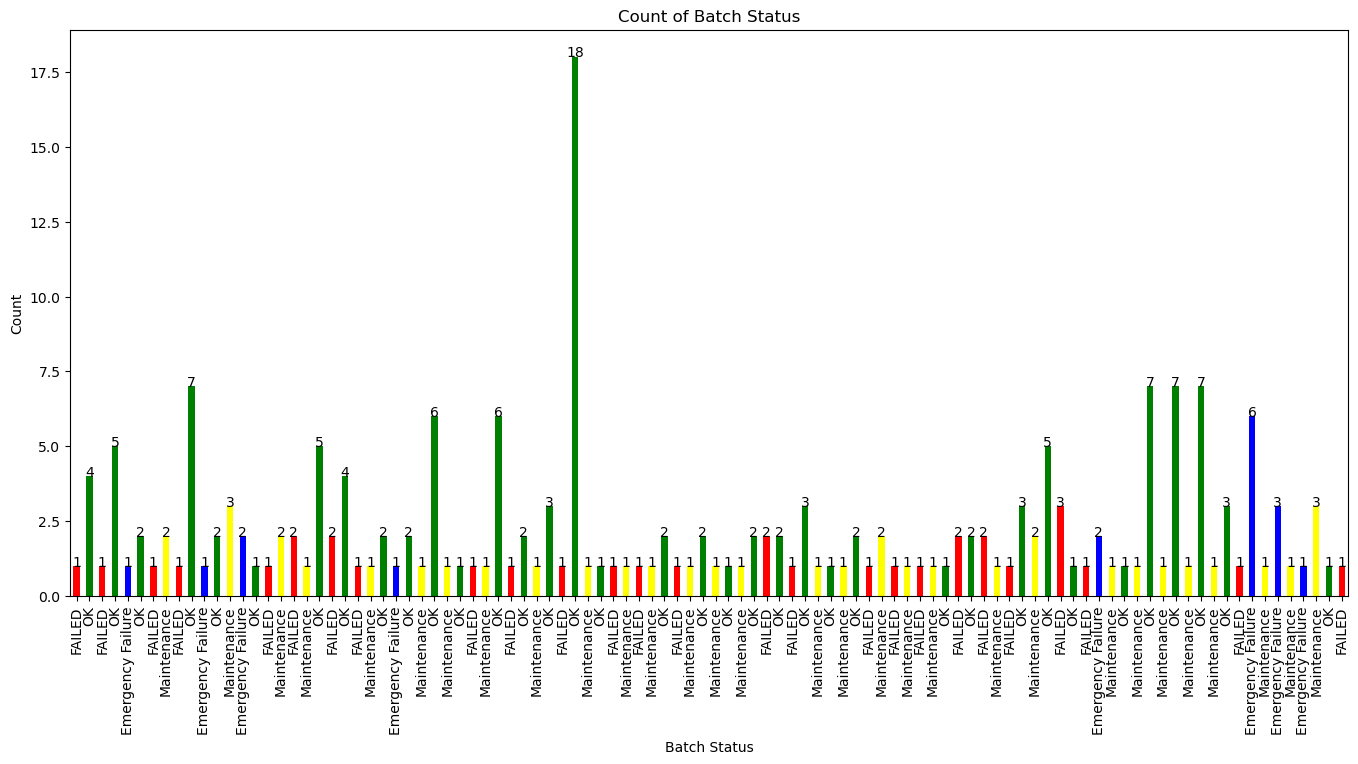

In [20]:
# make similar plots as above in batches of 100 and remaining data points
status_dff = status_df.head(100)
colors = {'OK': 'green', 'FAILED': 'red', 'Emergency Failure': 'blue','Maintenance': 'yellow'}
status_dff.plot(kind='bar', x='Batch Status', y='Count', color=status_dff['Batch Status'].map(colors), legend=False)
plt.xlabel('Batch Status')
plt.ylabel('Count')
plt.title('Count of Batch Status')
plt.tight_layout()
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 10)
for i in range(len(status_dff)):
    plt.text(i, status_dff['Count'][i], status_dff['Count'][i], ha = 'center')
plt.show()


KeyError: 0

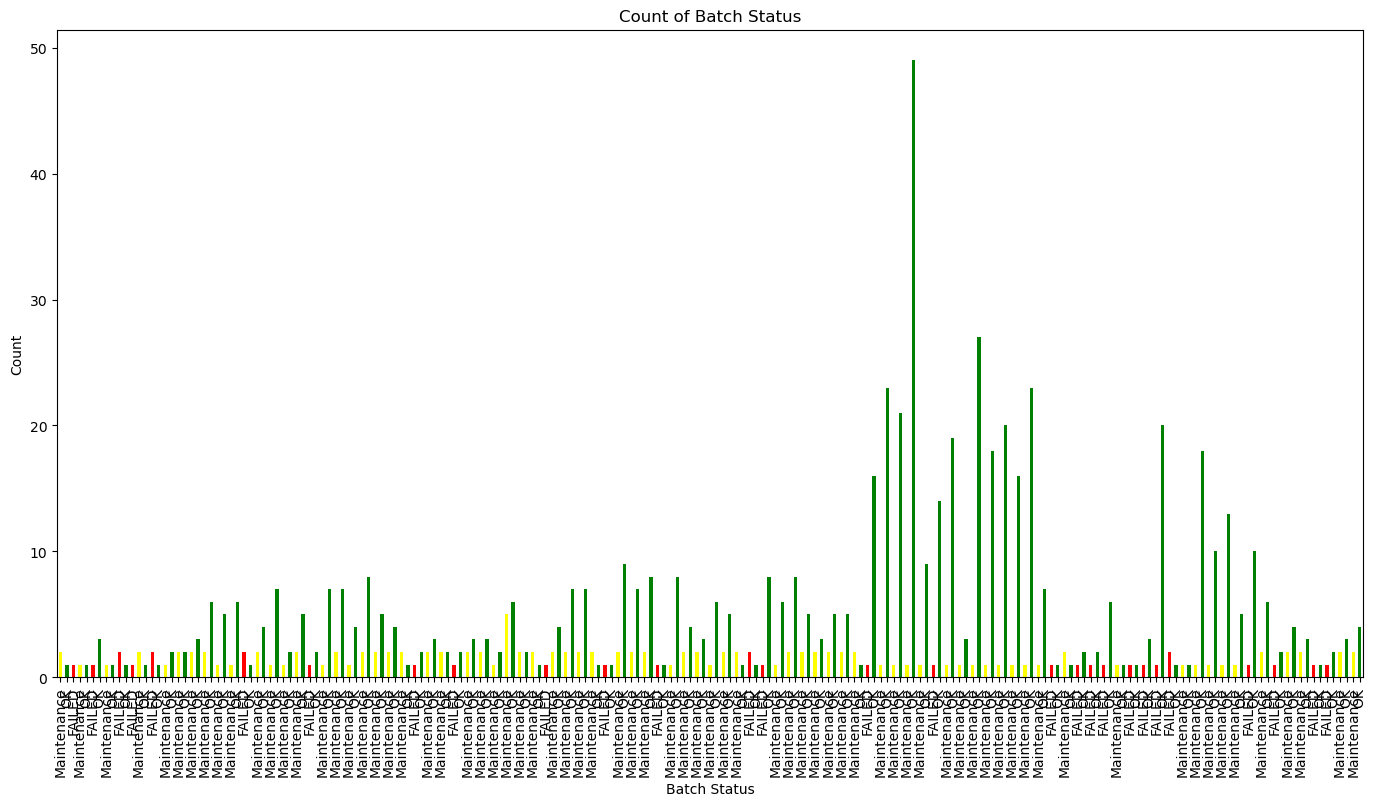

In [21]:
# do the same for the data points from 100 to 200
status_dfx = status_df[101:300]

colors = {'OK': 'green', 'FAILED': 'red', 'Emergency Failure': 'blue','Maintenance': 'yellow'}
status_dfx.plot(kind='bar', x='Batch Status', y='Count', color=status_dfx['Batch Status'].map(colors), legend=False)
plt.xlabel('Batch Status')
plt.ylabel('Count')
plt.title('Count of Batch Status')
plt.tight_layout()
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 10)
for i in range(len(status_dfx)):
    plt.text(i, status_dfx['Count'][i], status_dfx['Count'][i], ha = 'center')
plt.show()


KeyError: 0

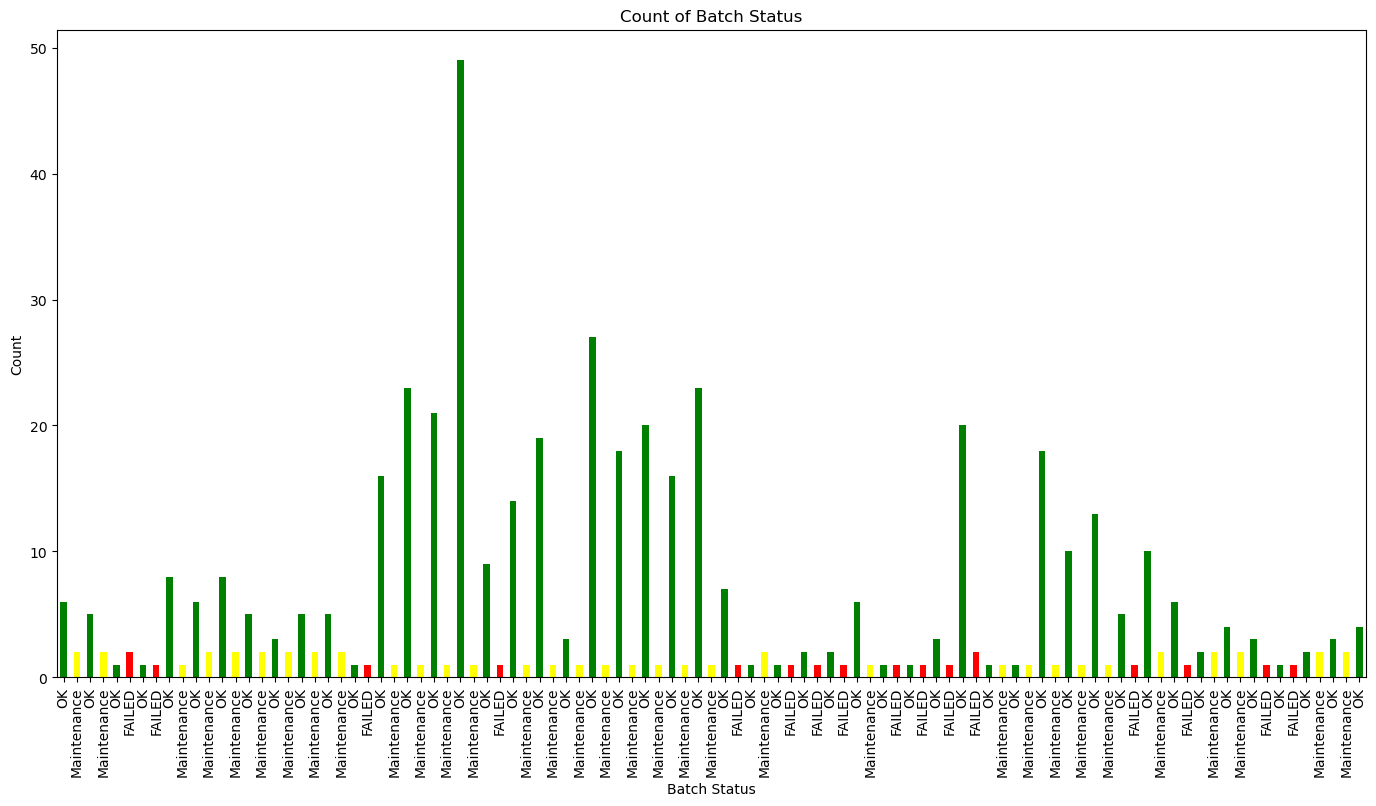

In [22]:
# do the same for the data points from 200 to 300
status_dfx = status_df[201:300]

colors = {'OK': 'green', 'FAILED': 'red', 'Emergency Failure': 'blue','Maintenance': 'yellow'}
status_dfx.plot(kind='bar', x='Batch Status', y='Count', color=status_dfx['Batch Status'].map(colors), legend=False)
plt.xlabel('Batch Status')
plt.ylabel('Count')
plt.title('Count of Batch Status')
plt.tight_layout()
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 10)
for i in range(len(status_dfx)):
    plt.text(i, status_dfx['Count'][i], status_dfx['Count'][i], ha = 'center')
plt.show()


In [23]:
#  for the bottom 70 datapoints
status_dfx = status_df[301:370]
  